In [1]:
import sys
sys.path.append('../1.load')

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from plot_utils import plot_mean_feature_per_well

from preprocess import preprocess_profiles


In [2]:
figsave_path = "output/plate_visualizations"

features = ["Cells_AreaShape_Area", "Cells_Intensity_MeanIntensity_AGP", "Image_Threshold_SumOfEntropies_CellsIncludingEdges", "Cells_Count"]

feature_select_ops = {"operation": ["drop_na_columns", "blocklist"], "image_features": True}

In [3]:
# profiles = pd.read_parquet("output/subset_profiles_cc_well_corrected.parquet")

profiles = {
    "raw_profiles":  "../1.load/output/raw_filtered_profiles.parquet",
    "cc_adj_profiles": "../3.correct/output/profiles_cc_adjusted.parquet",
    "well_mean_subtracted": "../3.correct/output/full_profiles_mean_corrected.parquet",
    "cc_adj_well_mean_subtracted": "../3.correct/output/full_profiles_cc_adj_mean_corr.parquet"
}

# profiles = pd.read_parquet("output/subset_profiles_cc_corrected.parquet")
# profiles

### Visualize mean feature values per well position

In [18]:
for p in profiles:
    df = pd.read_parquet(profiles[p])

    df = preprocess_profiles(df, feature_select_kwargs=feature_select_ops)

    for feature in features:
        print(f"{p} {feature} correlation with Cells_Count: {df[feature].corr(df['Cells_Count'])}")
        plot_mean_feature_per_well(df, feature, prefix=p, figsave_path=figsave_path)
        plt.show()

KeyboardInterrupt: 

### Visualize an average across all features after normalization

raw_profiles Cells_Average_Feature correlation with Cells_Count: -0.18115012869202402


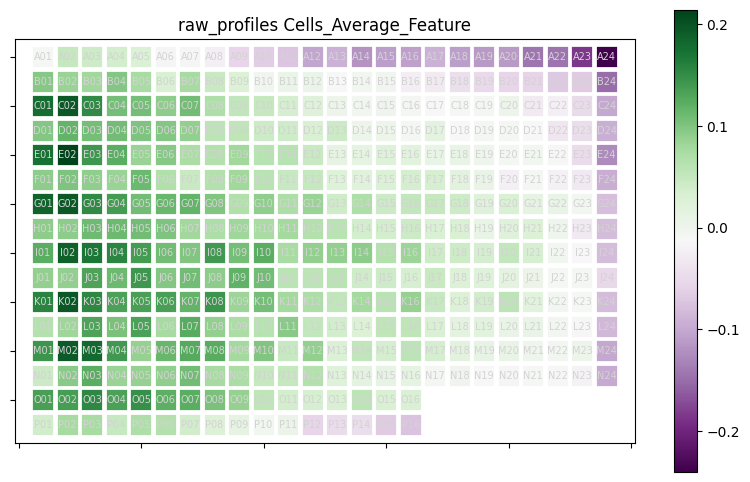

raw_profiles Nuclei_Average_Feature correlation with Cells_Count: -0.1953581182259045


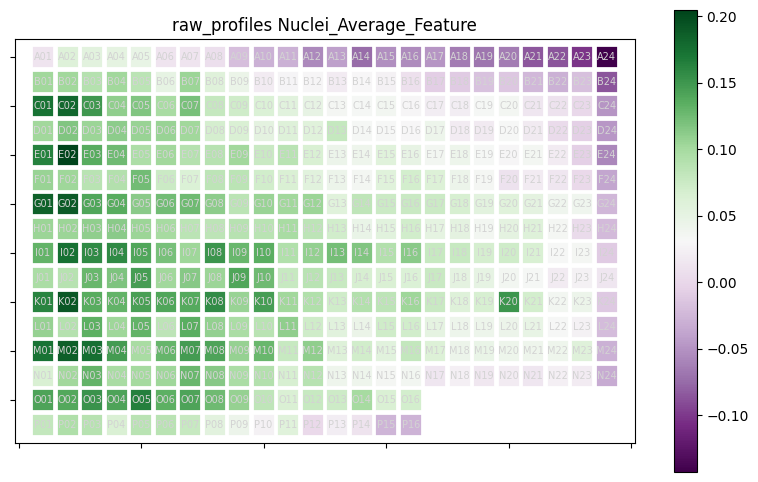

raw_profiles Cytoplasm_Average_Feature correlation with Cells_Count: -0.149122677059681


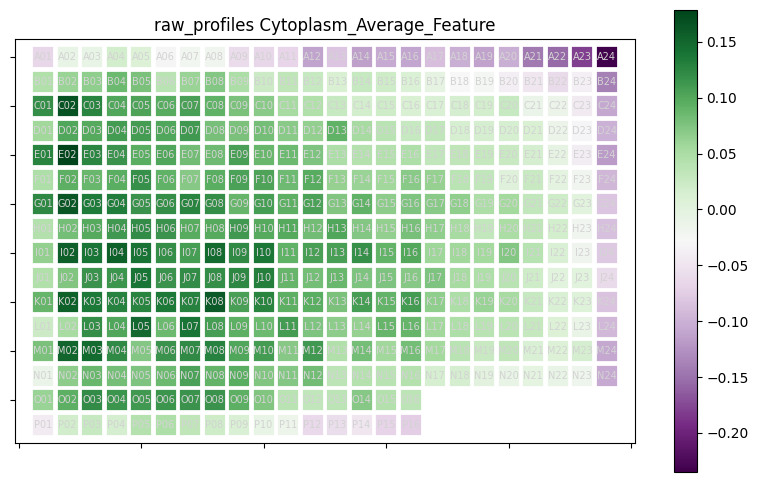

raw_profiles Image_Average_Feature correlation with Cells_Count: -0.2571492020092719


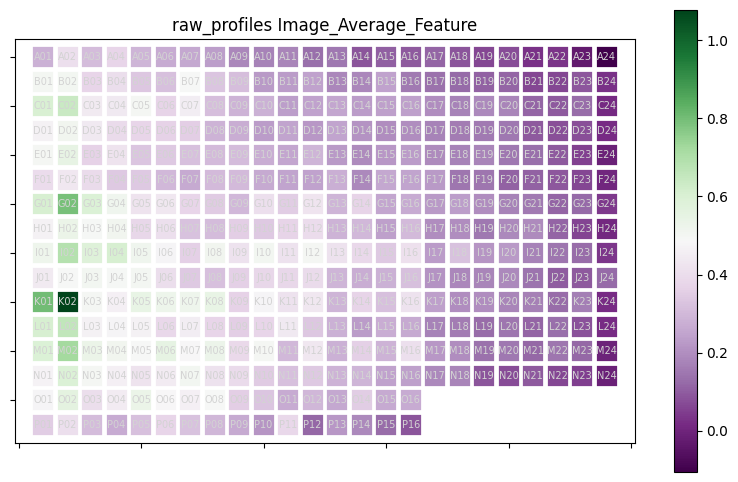

raw_profiles All_Average_Feature correlation with Cells_Count: -0.22440005649067088


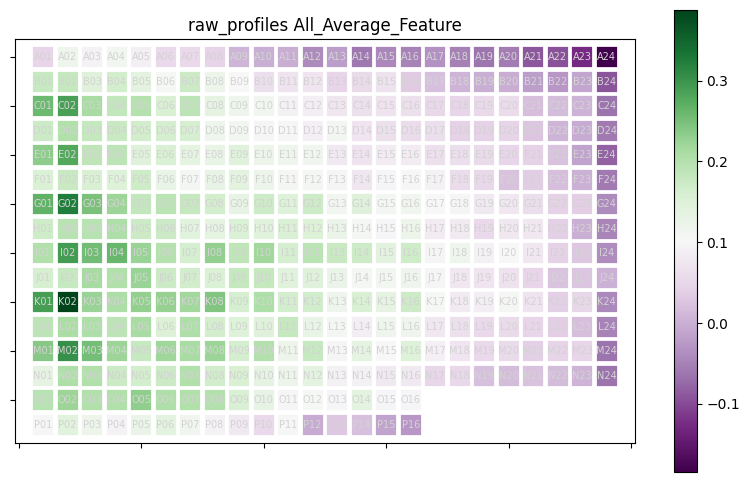

cc_adj_profiles Cells_Average_Feature correlation with Cells_Count: 0.003033728362252481


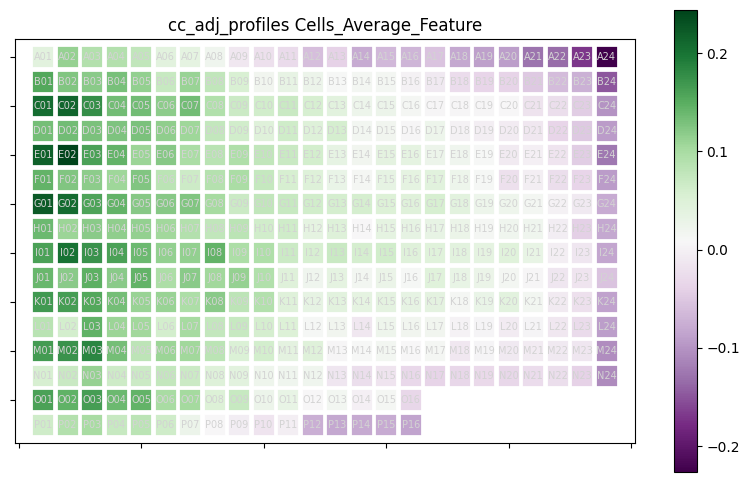

cc_adj_profiles Nuclei_Average_Feature correlation with Cells_Count: 1.4067121227515088e-13


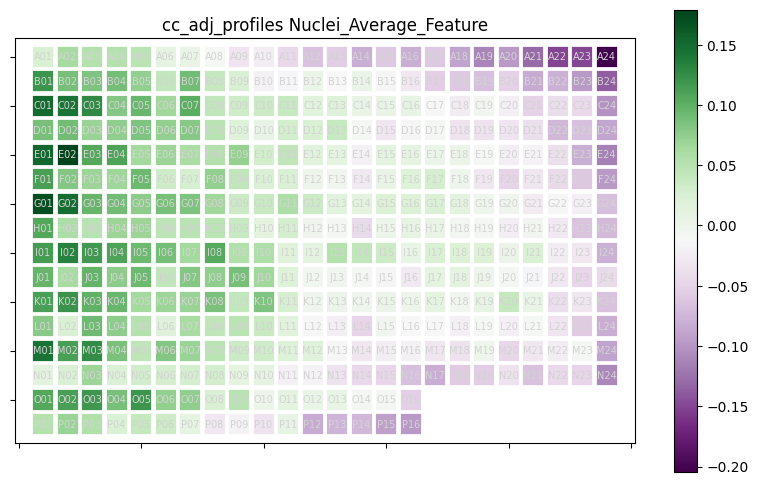

cc_adj_profiles Cytoplasm_Average_Feature correlation with Cells_Count: -1.4750752076848144e-17


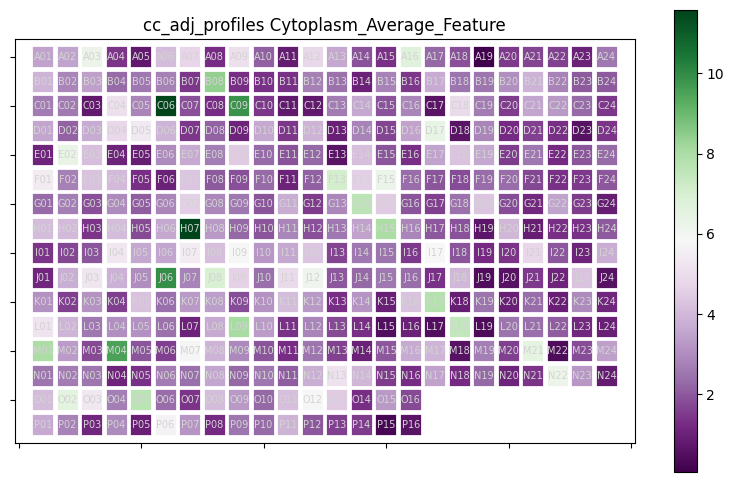

cc_adj_profiles Image_Average_Feature correlation with Cells_Count: -3.0070427937923126e-05


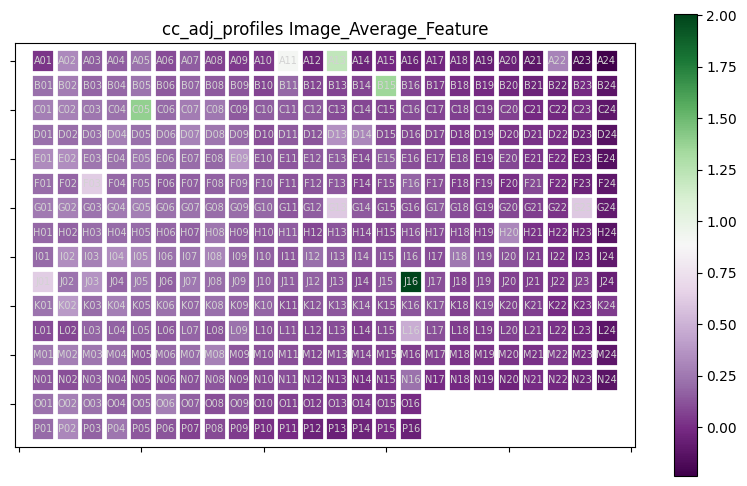

cc_adj_profiles All_Average_Feature correlation with Cells_Count: 3.359773440013661e-05


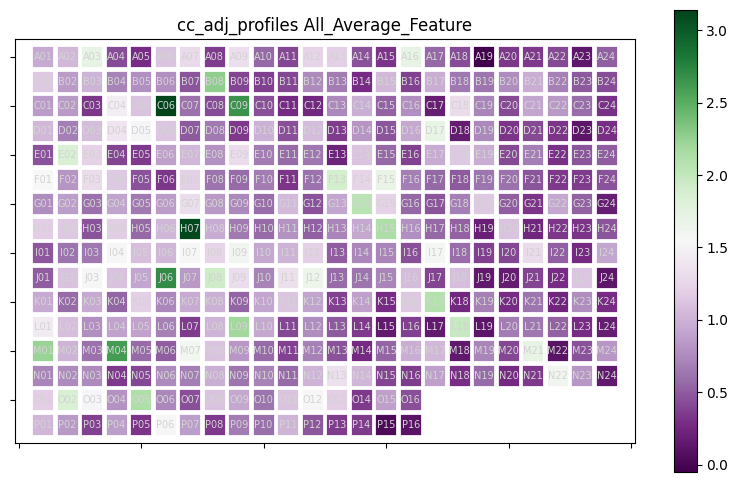

well_mean_subtracted Cells_Average_Feature correlation with Cells_Count: -0.18415892954408475


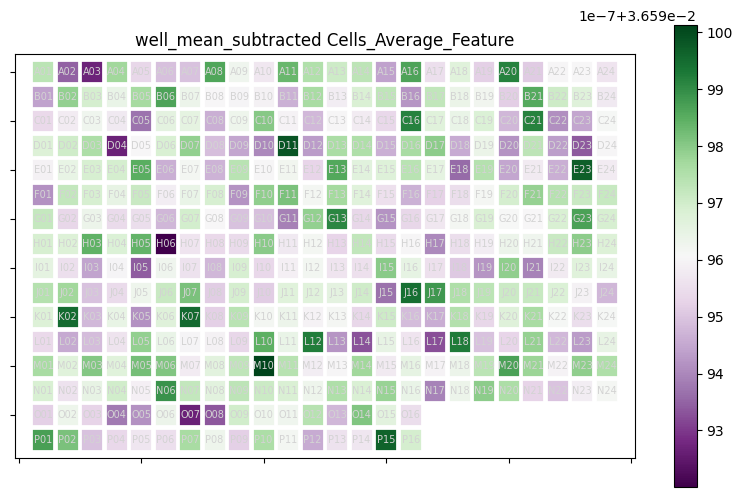

well_mean_subtracted Nuclei_Average_Feature correlation with Cells_Count: -0.1946463945264439


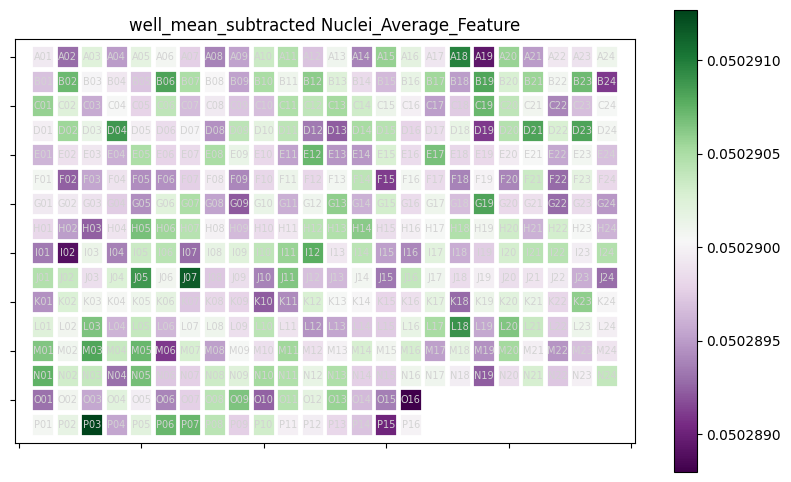

well_mean_subtracted Cytoplasm_Average_Feature correlation with Cells_Count: -0.09020130524850525


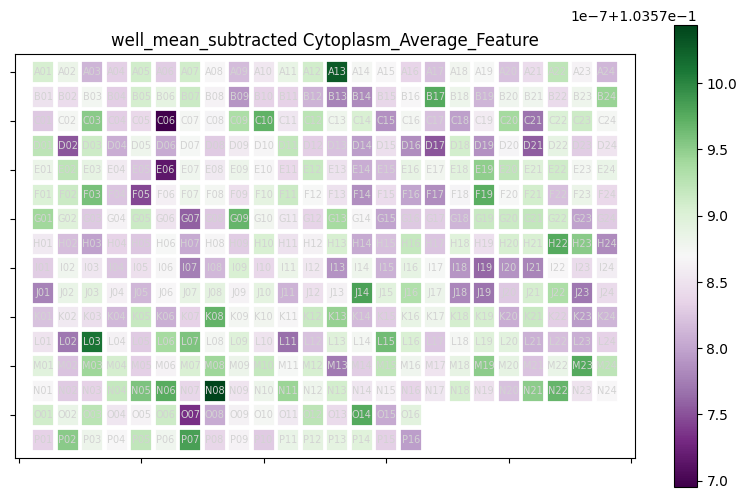

well_mean_subtracted Image_Average_Feature correlation with Cells_Count: 0.076413519853119


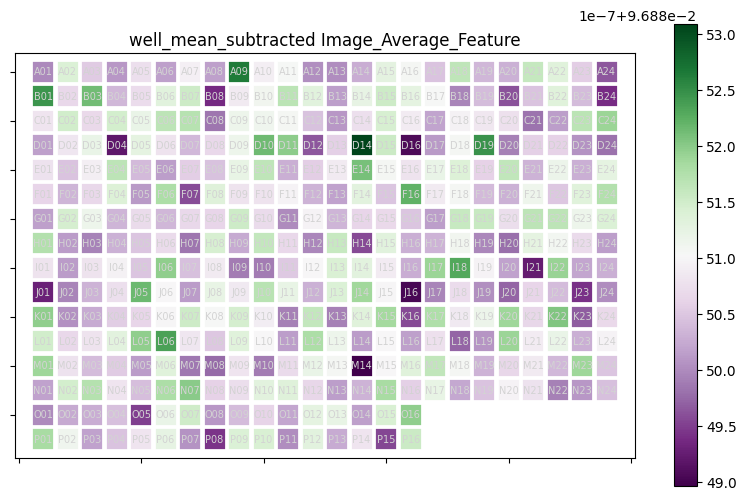

well_mean_subtracted All_Average_Feature correlation with Cells_Count: -0.04555769691351696


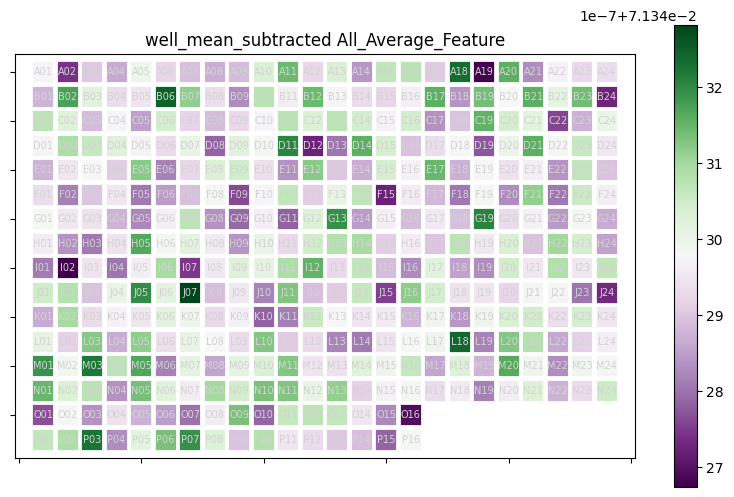

cc_adj_well_mean_subtracted Cells_Average_Feature correlation with Cells_Count: -0.012467690231507688


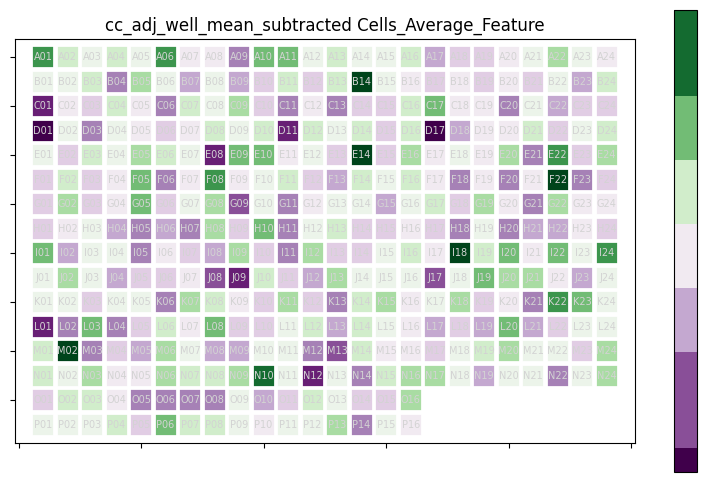

cc_adj_well_mean_subtracted Nuclei_Average_Feature correlation with Cells_Count: -0.016005098883121023


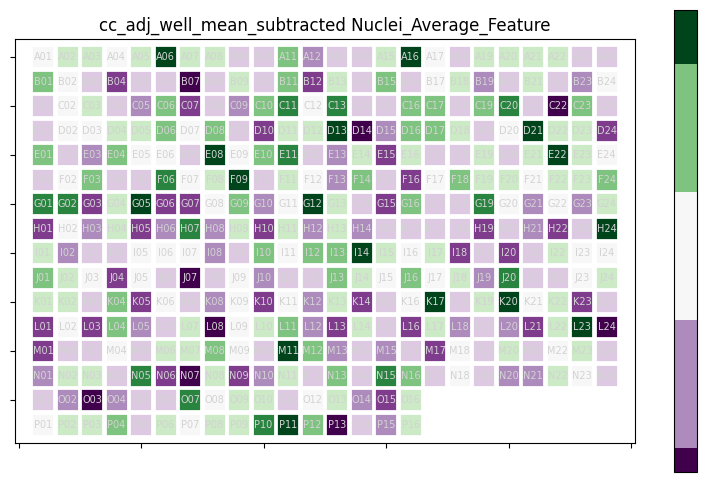

cc_adj_well_mean_subtracted Cytoplasm_Average_Feature correlation with Cells_Count: 0.0005201328711019091


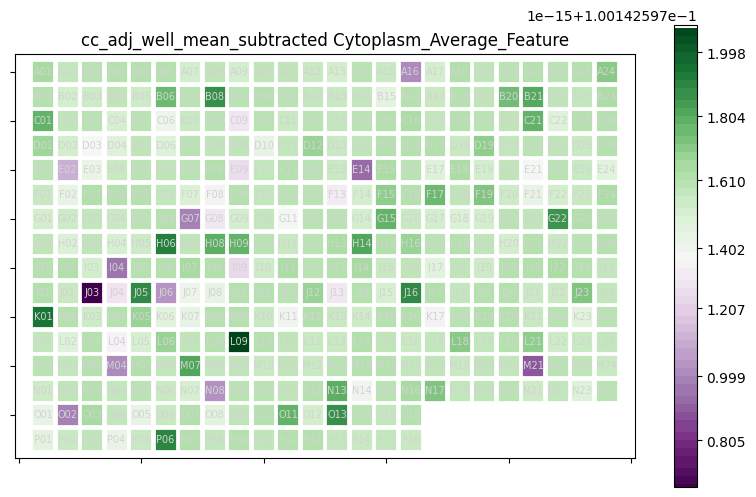

cc_adj_well_mean_subtracted Image_Average_Feature correlation with Cells_Count: -0.010597216206434498


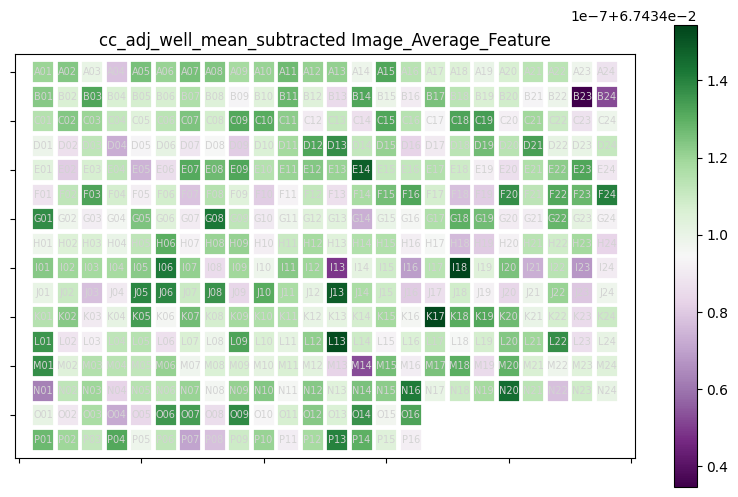

cc_adj_well_mean_subtracted All_Average_Feature correlation with Cells_Count: -0.008250190793126626


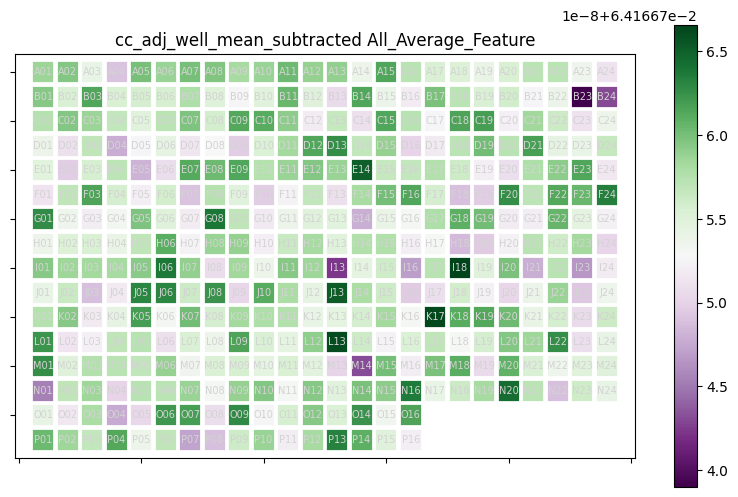

In [4]:
for p in profiles:
    df = pd.read_parquet(profiles[p])

    df = preprocess_profiles(df, feature_select_kwargs=feature_select_ops)

    df["Cells_Average_Feature"] = df.filter(regex="^Cells_").mean(1)
    df["Nuclei_Average_Feature"] = df.filter(regex="^Nuclei_").mean(1)
    df["Cytoplasm_Average_Feature"] = df.filter(regex="^Cytoplasm_").mean(1)
    df["Image_Average_Feature"] = df.filter(regex="^Image_").mean(1)
    df["All_Average_Feature"] = df.filter(regex="^(?!Metadata_)").mean(1)
    features = ["Cells_Average_Feature", "Nuclei_Average_Feature", "Cytoplasm_Average_Feature", "Image_Average_Feature", "All_Average_Feature"]

    for feature in features:
        print(f"{p} {feature} correlation with Cells_Count: {df[feature].corr(df['Cells_Count'])}")
        plot_mean_feature_per_well(df, feature, prefix=p, figsave_path=figsave_path)
        plt.show()